# **Reading Dataset**

In [128]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Music notes Dataset.csv")
data.head()

,label,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Whole,253,253,253,253,253,253,253,253,253,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0
1,Whole,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Whole,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Whole,253,253,253,253,253,253,253,253,253,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
4,Whole,252,252,252,252,252,252,252,252,252,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0


# **Checking its shape**

In [129]:
data.shape

(3989, 4097)

# **Finding Null values**

In [66]:
data.isnull().sum()

label    0
0        0
1        0
2        0
3        0
        ..
4091     1
4092     1
4093     1
4094     1
4095     1
Length: 4097, dtype: int64

In [67]:
data.fillna(0, inplace = True)

In [68]:
data.isnull().sum()

label    0
0        0
1        0
2        0
3        0
        ..
4091     0
4092     0
4093     0
4094     0
4095     0
Length: 4097, dtype: int64

## **Working with T-SNE**

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# **Splitting input_data & label_data**

In [70]:
input = data.drop(['label'], axis = 1)
input.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,253,253,253,253,253,253,253,253,253,253,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0
1,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,253,253,253,253,253,253,253,253,253,253,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
4,252,252,252,252,252,252,252,252,252,252,...,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0


In [71]:
output = data['label']
output.head()

0    Whole
1    Whole
2    Whole
3    Whole
4    Whole
Name: label, dtype: object

# **Setting up values for the model**

In [87]:
model = TSNE(n_components=3, random_state=0, n_iter = 5000, perplexity=50)

# **Training the Model**

In [88]:
tsne = model.fit_transform(input)

# **Concatenation**

In [92]:
tsne = np.vstack((tsne.T, output)).T

# **Framing the data**

In [98]:
tsne_selected = tsne[:, :3]
tsne_df = pd.DataFrame(data=tsne_selected, columns=('x', 'y', 'z'))

In [99]:
tsne_df['label'] =label_data = data['label']

# **2000 iterations & perplexity = 60**

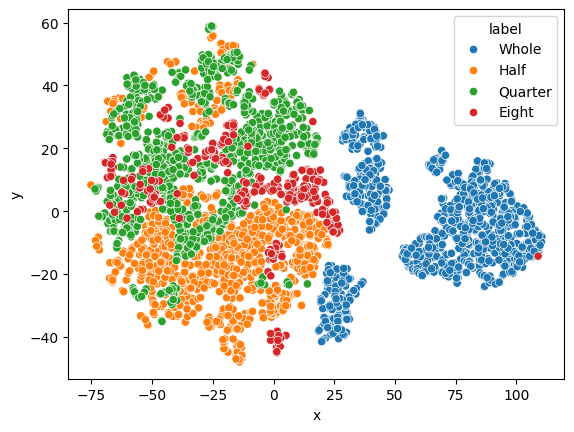

In [ ]:
import seaborn as sns
sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = tsne_df)
plt.show()

# **2D with 5000 iterations and 50 perplexity**

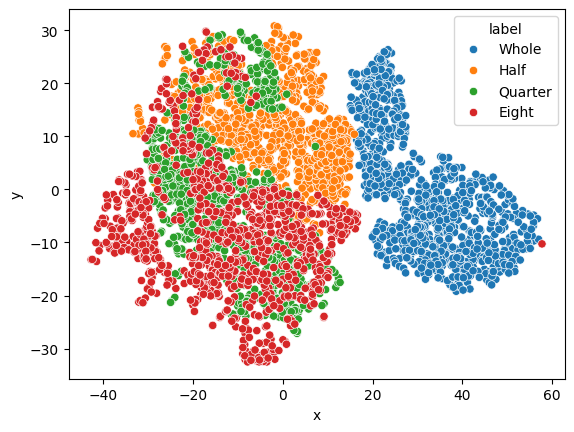

In [100]:
import seaborn as sns #2D
sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = tsne_df)
plt.show()

# **3D with 5000 iterations and 50 perplexity**

In [103]:
import plotly.express as px #3D
fig = px.scatter_3d(tsne_df, x = 'x', y = 'y', z = 'z', color = 'label',opacity = .6)
fig.show()

# **Checking Accuracy**

In [127]:
from sklearn.metrics import accuracy_score
predicted_labels = model.predict(input)
accuracy = accuracy_score(output, predicted_labels) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 95.76%
